In [87]:
# Import libraries
import matplotlib.pyplot as plt # Matplotlib is used for plotting
import pandas as pd             # Pandas helps organize data structures
import numpy as np              # Numpy provides mathematical functions like sqrt()
import patsy
import math
import scipy as sp
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import sys
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import accuracy_score
# import warnings
# warnings.filterwarnings('ignore') #to clean up 

In [2]:
sys.setrecursionlimit(3000)

In [3]:
# Data is separate and large 
exoTest = pd.read_csv('exoTest.csv')
exoTrain = pd.read_csv('exoTrain.csv')

In [4]:
test = exoTest.copy()
train = exoTrain.copy()

In [5]:
test['LABEL'] = test['LABEL']-1
train['LABEL'] = train['LABEL']-1

In [6]:
train.shape

(5087, 3198)

In [7]:
# train_drop = train[train['FLUX.1'] < 2000] 
# train_drop = train_drop[train_drop['FLUX.1'] > -2000]

In [8]:
train_drop = train.T[train.T.columns[train.T.max() < 2000]].T
train_drop = train_drop.T[train_drop.T.columns[train_drop.T.min() > -2000]].T

In [9]:
train_drop.shape

(4246, 3198)

In [10]:
print(train.isnull().any().any())
print(test.isnull().any().any())

False
False


In [11]:
# train_drop.head(40)

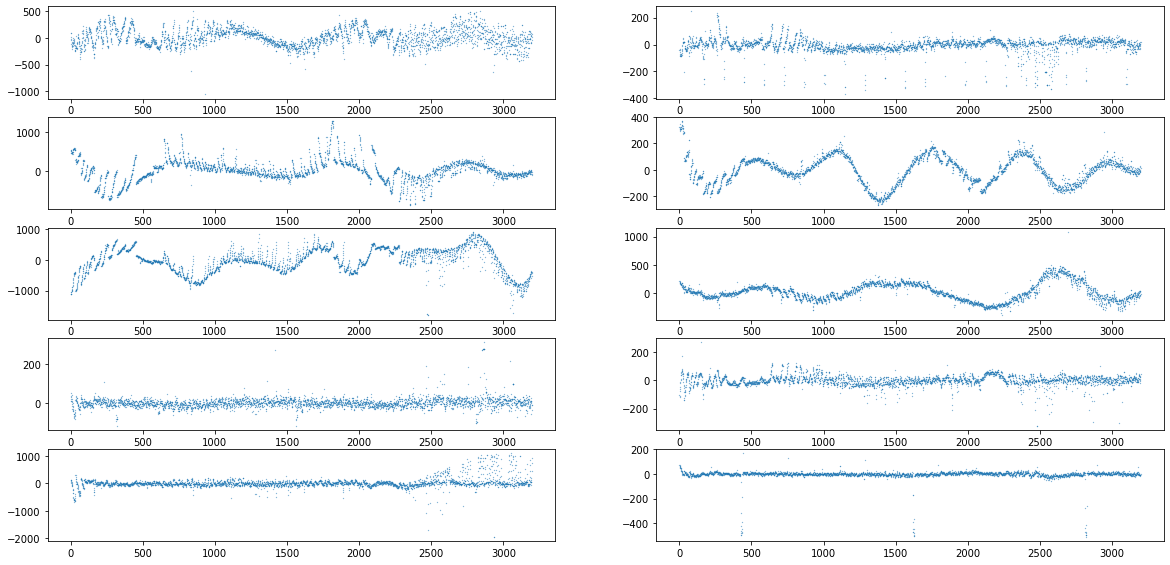

In [12]:
# First 10 flux periods
fig = plt.figure(figsize = (20, 20))
for i in range(0, 10):
    if train_drop.iloc[i, 0] == 1:
        ax = fig.add_subplot(10, 2, i+1)
        plt.scatter(x = range(1, 3198), y = train_drop.iloc[i, 1:3198], s=0.05)
        
plt.savefig('exoflux')

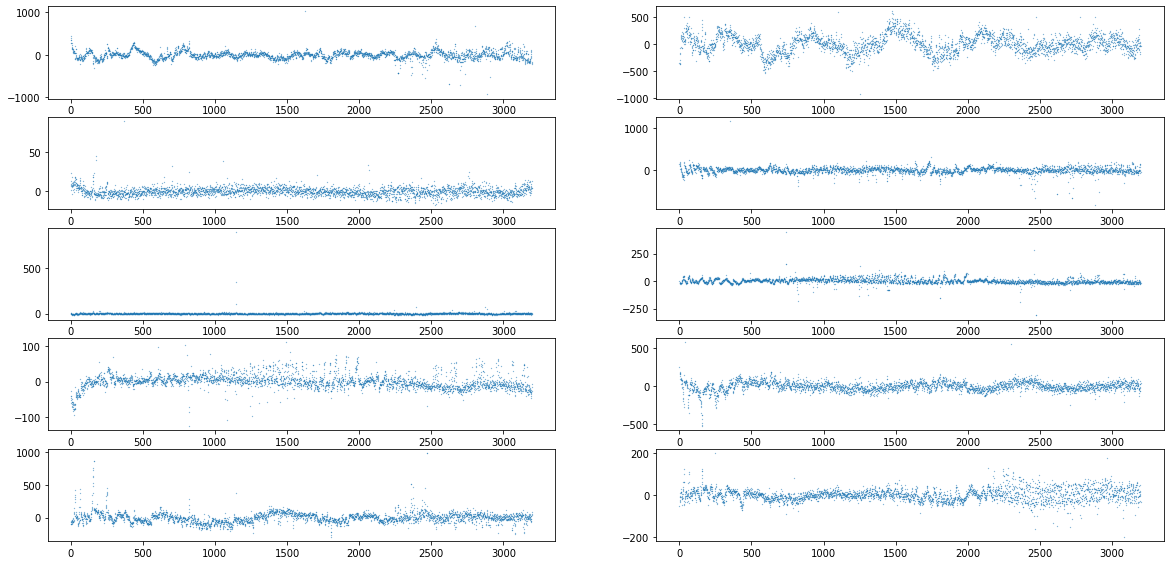

In [13]:
# First 100 flux periods
fig = plt.figure(figsize = (20, 20))
for i in range(37, 47):
    if train_drop.iloc[i, 0] == 0:
        ax = fig.add_subplot(10, 2, i-37+1)
        plt.scatter(x = range(1, 3198), y = train_drop.iloc[i, 1:3198], s=0.05)
plt.savefig('nonexoflux')

In [14]:
# corr = train.corr()

In [15]:
# sns.heatmap(corr)

In [181]:
X = train_drop.iloc[:, 1:3198]
# X = np.asarray(X).reshape(-1,1)
X_t = test.iloc[:, 1:3198]
# X_t = np.asarray(X_t).reshape(-1,1)
y = train_drop.iloc[:, 0]
y_t = test.iloc[:, 0]

In [17]:
X.shape

(4246, 3197)

## Normalizing of Data

In [148]:
# scaler = preprocessing.StandardScaler()
# X_scale = X.copy()
# for i, row in X.iterrows():
#     if i == 0:
#         X_scale.loc[i] = scaler.fit_transform(row.values.reshape(-1,1))
# # X_tscale = scaler.fit_transform(X_t)
# # X_scale = pd.DataFrame(X_scale, columns=X.columns)
# # X_tscale = pd.DataFrame(X_tscale, columns=X_t.columns)

In [175]:
def normalize(X):
    Y= (X-np.mean(X))/(np.max(X)-np.min(X))
    return Y

In [176]:
X = X.apply(normalize,axis=1)
X_t = X_t.apply(normalize, axis=1)

In [90]:
# fig = plt.figure(figsize = (20, 20))
# for i in range(37, 47):
#     ax = fig.add_subplot(10, 2, i-37+1)
#     plt.scatter(x = range(1, 3197), y = X.iloc[i, 1:3197], s=0.05)

In [140]:
X_scale.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


## Logistic Regression

In [118]:
reg = LogisticRegression(class_weight = {0: 0.9, 1: 0.01}).fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [119]:
yhat = reg.predict(X_t)
prob = reg.predict_proba(X_t)
#preds = prob[:, 1]
preds = np.where(reg.predict_proba(X_t)[:,1] > 0.99, 1, 0)
roc_auc = roc_auc_score(y_t, preds)
confusion_matrix(y_t, yhat, labels=[0,1])
print(roc_auc)

0.7663716814159294


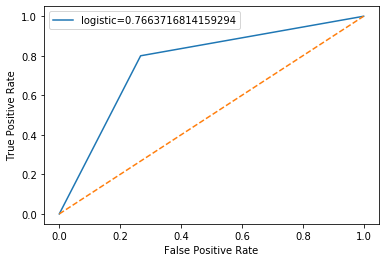

In [120]:
fpr, tpr, _ = metrics.roc_curve(y_t,  preds)
auc = metrics.roc_auc_score(y_t, preds)
plt.plot(fpr,tpr,label="logistic="+str(auc))
plt.plot([0,1], [0,1], linestyle='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('Logistic')

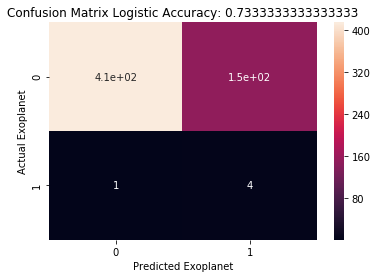

In [121]:
corr = confusion_matrix(y_t, preds)
acc = accuracy_score(y_t, preds)
ax = plt.subplot()
sns.heatmap(corr, annot=True, ax = ax) 
# labels, title and ticks
ax.set_xlabel('Predicted Exoplanet')
ax.set_ylabel('Actual Exoplanet')
ax.set_title('Confusion Matrix Logistic Accuracy: ' + str(acc))
plt.savefig('logistic_confusion')

## C = 0.5 and Class Weights

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7619469026548673


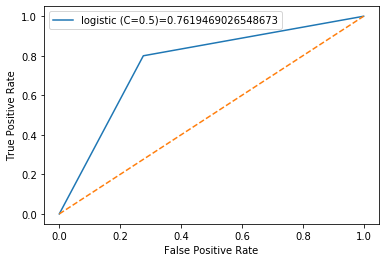

In [67]:
regC = LogisticRegression(C=0.5, class_weight = {0: 0.9, 1: 0.1 }).fit(X, y)
yhat = regC.predict(X_t)
prob = regC.predict_proba(X_t)
preds = np.where(regC.predict_proba(X_t)[:,1] > 0.99, 1, 0)
roc_auc = roc_auc_score(y_t, preds)
confusion_matrix(y_t, yhat, labels=[0,1])
print(roc_auc)
fpr, tpr, _ = metrics.roc_curve(y_t,  preds)
auc = metrics.roc_auc_score(y_t, preds)
plt.plot(fpr,tpr,label="logistic (C=0.5)="+str(auc))
plt.plot([0,1], [0,1], linestyle='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('Logistic_C_5.png')

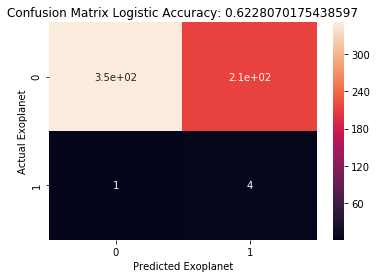

In [68]:
corr = confusion_matrix(y_t, yhat)
acc = accuracy_score(y_t, yhat)
ax = plt.subplot()
sns.heatmap(corr, annot=True, ax = ax) 
# labels, title and ticks
ax.set_xlabel('Predicted Exoplanet')
ax.set_ylabel('Actual Exoplanet')
ax.set_title('Confusion Matrix Logistic Accuracy: ' + str(acc))
plt.savefig('logisticC_5_confusion')

In [86]:
# roc = {}
# roc_test = {}
# for x in range(1, 3198):
#     X = train.iloc[:, x]
#     X = np.asarray(X).reshape(-1,1)
#     X_t = test.iloc[:, x]
#     X_t = np.asarray(X_t).reshape(-1,1)
#     y = train.iloc[:, 0]
#     y_t = test.iloc[:, 0]
#     reg = LogisticRegression().fit(X, y)
#     prob = reg.predict_proba(X)
#     probt = reg.predict_proba(X_t)
#     pred = prob[:, 1]
#     predt = probt[:, 1]
#     roc_auc = roc_auc_score(y, pred)
#     roc_auct = roc_auc_score(y_t, predt)
#     roc_test.update({test.columns[x]:roc_auct})
#     roc.update({train.columns[x] + " " + str(x):roc_auc})

In [87]:
# plt.scatter(x=range(1, 3198), y=roc.values(), color='blue')
# # plt.ylim([0.00721,0.007221])
# print(max(roc, key=roc.get))

In [88]:
# plt.scatter(x=range(1, 3198), y=roc_test.values(), color='blue')
# # plt.ylim([0.00721,0.007221])
# print(max(roc_test, key=roc_test.get))

## Step wise selection may be inefficient due to large number of parameters
<br><br>
## Trying with ridge regression

In [18]:
X = train_drop.iloc[:, 1:3198]
# X = np.asarray(X).reshape(-1,1)
X_t = test.iloc[:, 1:3198]
# X_t = np.asarray(X_t).reshape(-1,1)
y = train_drop.iloc[:, 0]
y_t = test.iloc[:, 0]

In [19]:
clf = LogisticRegression(penalty="l2", solver='sag', n_jobs = 4, tol=0.0001, max_iter = 3000000)

In [20]:
regl = clf.fit(X,y)

In [164]:
prob = regl.predict_proba(X_t)[:, 1]
pred = regl.predict(X_t)
preds = np.where(regl.predict_proba(X_t)[:,1] > 0.9, 1, 0)
roc_auc = roc_auc_score(y_t, preds)
print(roc_auc)

0.7212389380530972


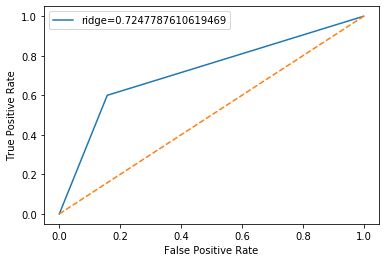

In [165]:
fpr, tpr, _ = metrics.roc_curve(y_t,  preds)
auc = metrics.roc_auc_score(y_t, pred)
plt.plot(fpr,tpr,label="ridge="+str(auc))
plt.plot([0,1], [0,1], linestyle='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('ridge')

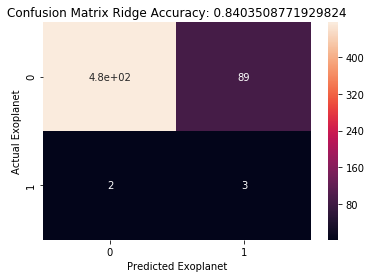

In [166]:
corr = confusion_matrix(y_t, preds)
ax = plt.subplot()
sns.heatmap(corr, annot=True, ax = ax) 
acc = accuracy_score(y_t, preds)
# labels, title and ticks
ax.set_xlabel('Predicted Exoplanet')
ax.set_ylabel('Actual Exoplanet')
ax.set_title('Confusion Matrix Ridge Accuracy: ' + str(acc))
plt.savefig('Ridge Confusion')

## Lasso

In [25]:
X = train_drop.iloc[:, 1:3198]
# X = np.asarray(X).reshape(-1,1)
X_t = test.iloc[:, 1:3198]
# X_t = np.asarray(X_t).reshape(-1,1)
y = train_drop.iloc[:, 0]
y_t = test.iloc[:, 0]

In [26]:
clflass = LogisticRegression(penalty="l1", solver='saga', n_jobs = 4, tol=0.0001, max_iter = 3000000)

In [27]:
lass = clflass.fit(X,y)

In [160]:
prob = lass.predict_proba(X_t)[:, 1]
pred = lass.predict(X_t)
preds = np.where(lass.predict_proba(X_t)[:, 1] > 0.9, 1, 0)
roc_auc = roc_auc_score(y_t, preds)
print(roc_auc)

0.7398230088495574


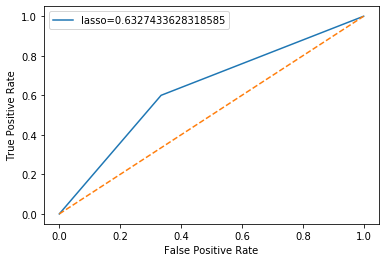

In [161]:
fpr, tpr, _ = metrics.roc_curve(y_t,  pred)
auc = metrics.roc_auc_score(y_t, pred)
plt.plot(fpr,tpr,label="lasso="+str(auc))
plt.plot([0,1], [0,1], linestyle='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('lasso')

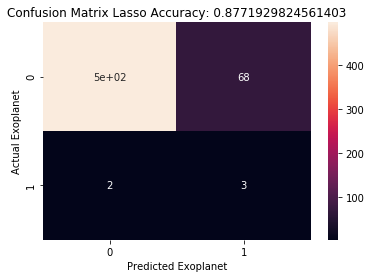

In [163]:
corr = confusion_matrix(y_t, preds)
ax = plt.subplot()
sns.heatmap(corr, annot=True, ax = ax) 
acc = accuracy_score(y_t, preds)
# labels, title and ticks
ax.set_xlabel('Predicted Exoplanet')
ax.set_ylabel('Actual Exoplanet')
ax.set_title('Confusion Matrix Lasso Accuracy: ' + str(acc))
plt.savefig('Lasso Confusion')

## Random Forest Classifier

In [184]:
model = RandomForestClassifier(n_estimators=200, 
                               bootstrap = True,
                               max_features = 'sqrt',
                               n_jobs = -1,
                               class_weight = {0: 0.99, 1: 0.01 })

In [185]:
model = model.fit(X, y)

In [186]:
rf_pred = model.predict(X_t)
rf_prob = model.predict_proba(X_t)[:, 1]
roc_auc_rf = roc_auc_score(y_t, rf_prob)
print(roc_auc_rf)

0.8338053097345133


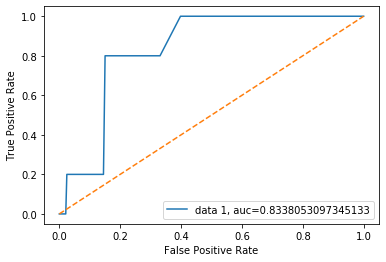

In [189]:
fpr, tpr, _ = metrics.roc_curve(y_t, rf_prob)
auc = metrics.roc_auc_score(y_t, rf_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0,1], [0,1], linestyle='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('RFROC')

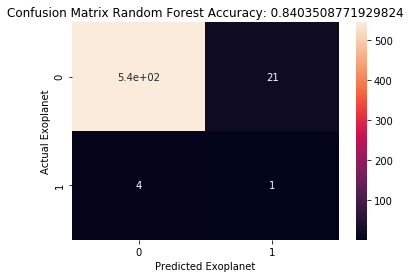

In [190]:
corr = confusion_matrix(y_t, rf_pred)
ax = plt.subplot()
sns.heatmap(corr, annot=True)
ax.set_xlabel('Predicted Exoplanet')
ax.set_ylabel('Actual Exoplanet')
ax.set_title('Confusion Matrix Random Forest Accuracy: ' + str(acc))
plt.savefig('RF Confusion')

In [50]:
fi = pd.DataFrame({'feature': list(train.iloc[:, 1:3198].columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

# taken from https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

In [51]:
fi.head()

,feature,importance
2934,FLUX.2935,0.010853
3054,FLUX.3055,0.009722
1669,FLUX.1670,0.007106
2476,FLUX.2477,0.006816
1326,FLUX.1327,0.006680


## KNN not good for data with large number of parameters and large n

## Trying with SVC (Support vector machines)

In [52]:
# Start with linear svc
sv_model = SVC(kernel='sigmoid', probability = True)
normalized_X = preprocessing.normalize(X)
normalized_X_t = preprocessing.normalize(X_t)

In [53]:
sv_model = sv_model.fit(normalized_X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [54]:
sv_pred = sv_model.predict(normalized_X_t)
sv_prob = sv_model.predict_proba(normalized_X_t)[:, 1]
sv_roc = roc_auc_score(y_t, sv_prob)
print(sv_roc)

0.40212389380530966


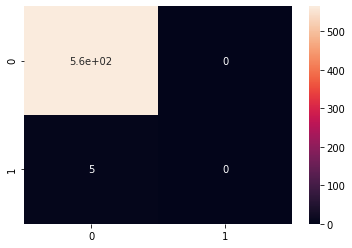

In [55]:
corr = confusion_matrix(y_t, sv_pred)
sns.heatmap(corr, annot=True)

## PCA

In [56]:
# X = train_drop.iloc[:, 1:3198]
# # X = np.asarray(X).reshape(-1,1)
# X_t = test.iloc[:, 1:3198]
# # X_t = np.asarray(X_t).reshape(-1,1)
# y = train_drop.iloc[:, 0]
# y_t = test.iloc[:, 0]

In [57]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True
scaler.fit(X)
scaled_X = scaler.transform(X)
labels = train['FLUX.1']
pca = PCA()
pca.fit(scaled_X)
X_with_pca = pca.transform(scaled_X)
variance = pca.explained_variance_ratio_
for ind, var in enumerate(variance):
    print("Explained Variance for Principal Component {}: {}".format(ind, var))
                        
# from https://github.com/BriantOliveira/NASA-Exoplanet/blob/master/Exoplanet-Hunting-Dataset.ipynb

Explained Variance for Principal Component 0: 0.05865893787322053
Explained Variance for Principal Component 1: 0.04652868299508207
Explained Variance for Principal Component 2: 0.04405661400365896
Explained Variance for Principal Component 3: 0.03682805099348478
Explained Variance for Principal Component 4: 0.035264109802962906
Explained Variance for Principal Component 5: 0.03135435402058876
Explained Variance for Principal Component 6: 0.027941770109222126
Explained Variance for Principal Component 7: 0.025101580194570598
Explained Variance for Principal Component 8: 0.02438088652415314
Explained Variance for Principal Component 9: 0.01941758220263749
Explained Variance for Principal Component 10: 0.018493706269652792
Explained Variance for Principal Component 11: 0.017449736184859614
Explained Variance for Principal Component 12: 0.01691484963708064
Explained Variance for Principal Component 13: 0.0158138445996466
Explained Variance for Principal Component 14: 0.014945369906767899


Explained Variance for Principal Component 1615: 2.8987817007916912e-05
Explained Variance for Principal Component 1616: 2.8923933137421202e-05
Explained Variance for Principal Component 1617: 2.890200598241384e-05
Explained Variance for Principal Component 1618: 2.8802960271938084e-05
Explained Variance for Principal Component 1619: 2.8797527109832293e-05
Explained Variance for Principal Component 1620: 2.878119007279009e-05
Explained Variance for Principal Component 1621: 2.872700500546746e-05
Explained Variance for Principal Component 1622: 2.865152199278736e-05
Explained Variance for Principal Component 1623: 2.8647128161838813e-05
Explained Variance for Principal Component 1624: 2.8585727164481994e-05
Explained Variance for Principal Component 1625: 2.8544436580864254e-05
Explained Variance for Principal Component 1626: 2.8526955218443336e-05
Explained Variance for Principal Component 1627: 2.849030205666216e-05
Explained Variance for Principal Component 1628: 2.8442268118208008e-

Explained Variance for Principal Component 2955: 2.139369016632924e-06
Explained Variance for Principal Component 2956: 2.1288444722935547e-06
Explained Variance for Principal Component 2957: 2.125442197021403e-06
Explained Variance for Principal Component 2958: 2.1031034268843055e-06
Explained Variance for Principal Component 2959: 2.0910813645565815e-06
Explained Variance for Principal Component 2960: 2.0874334191897027e-06
Explained Variance for Principal Component 2961: 2.0762728024682806e-06
Explained Variance for Principal Component 2962: 2.058193938040696e-06
Explained Variance for Principal Component 2963: 2.053912368650115e-06
Explained Variance for Principal Component 2964: 2.051344662063315e-06
Explained Variance for Principal Component 2965: 2.0415407736972304e-06
Explained Variance for Principal Component 2966: 2.0223711182241986e-06
Explained Variance for Principal Component 2967: 2.020968179904111e-06
Explained Variance for Principal Component 2968: 2.012460908790751e-06

## Fourier Time Series 

In [191]:
# from scipy.fftpack import fft, ifft